# Creating Customer Segments by RFM score Using Clustering 
### Kanja Saha,12/22/ 2017

## Steps
1. <a href='#import_lib'>Import Libraries</a>
2. <a href='#import_data'>Import Data</a>
3. <a href='#preprocess'>Preprocess Data</a>
4. <a href='#explore'>Explore Data</a>
5. <a href='#implement'>Implement Algorithms</a>
6. <a href='#reference'>Reference</a>

## Import Libraries
<a id='import_lib'></a>
In general, import all libraries before importing data. However, for learning purpose, import libraries in each step as needed. This is will give a better understanding of the libraries and their functions.

In [1]:
# Import libraries necessary for this project
#For all data processing functions
#import panda as pd 

#For all numerical processing
#import numpy as np 

#from IPython.display import display # Allows the use of display() for DataFrames
#import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
#import visuals as vs


## Import Data
<a id='import_data'></a>
In general, import all needed libraries before importing data. If this is a learning execise, import libraries in each step as needed. This is will give a better understanding of the libraries. 

In [2]:
#import necessary libraries
import pandas as pd
from IPython.display import display

# Load the dataset into pandas dataframe
raw_data = pd.read_excel("Online_Retail.xlsx")
print ("Dataset has {} rows(samples) with {} columns(features) each.".format(*raw_data.shape))

# display the top 5 rows of the dataset
raw_data.head(5)

Dataset has 541909 rows(samples) with 8 columns(features) each.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#summary of dataset's distribution
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
#items with negative quantity implies returned items, and 0 implies no purchase
raw_data[raw_data.Quantity<=0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [5]:
raw_data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [6]:
from datetime import datetime
#calculate recency for each transaction
currentDT = pd.to_datetime(datetime.now().date())
Most_recent_date = raw_data['InvoiceDate'].max()
#raw_data['Recency']= (pd.to_datetime(datetime.now().date())-pd.to_datetime(raw_data.InvoiceDate)).dt.days
raw_data['Recency']= (pd.to_datetime(Most_recent_date)-pd.to_datetime(raw_data.InvoiceDate)).dt.days

# store the returned items in a dataset
returned_invoices=raw_data[raw_data.Quantity<0]
returned_invoices['Quantity']=returned_invoices['Quantity']*-1

# remove transactions that has negative or 0 quantity or with unit price
raw_data=raw_data[(raw_data.Quantity>0) & (raw_data.UnitPrice>0)]

# get the list of items that are purchased and then returned
keys = ['CustomerID', 'StockCode','Quantity']
i1 = raw_data.set_index(keys).index
i2 = returned_invoices.set_index(keys).index
raw_data_filtered=raw_data[~i1.isin(i2)]


C:\Users\ksaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
import numpy as np

#Calculate revenue(monetization) generated by each customer
def total_price(raw_data_filtered):
    x = (raw_data_filtered.Quantity * raw_data_filtered.UnitPrice)
    return np.sum(x)

data=pd.DataFrame()
data['monetization']=raw_data_filtered.groupby('CustomerID').apply(total_price)
#get the recency of the account
data['recency']=raw_data.groupby('CustomerID').agg({'Recency': np.min})
#get the total number of transactions
data['frequency']=raw_data.groupby('CustomerID').Recency.nunique()

#save customer_id which is an index in the data frame 
CustomerID=data.index
# show summary of the data distribution
data.describe()


,monetization,recency,frequency
count,4324.000000,4324.000000,4324.000000
mean,1924.122274,91.445190,3.883904
std,8228.468418,100.041229,5.999879
min,2.900000,0.000000,1.000000
25%,305.475000,17.000000,1.000000
50%,663.630000,50.000000,2.000000
75%,1624.420000,141.000000,4.000000
max,278528.420000,373.000000,136.000000


## Preprocess Data
<a id='preprocess'></a>


In [8]:
print('Is there null value in the data frame? {}.' .format('Yes' if (data.isnull().values.any()) else 'No' ))
if (data.isnull().values.any()):
    print(data.isnull().sum())
    
raw_data=raw_data.dropna(subset=['CustomerID'])

raw_data[raw_data['CustomerID'].isnull()].head()

Is there null value in the data frame? No.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency


In [9]:
#max_frequency=[136]

#good_data = data.loc[~data.frequency.isin(max_frequency)]
#data=good_data
#data.describe()

In [10]:
import preprocess_data as o
data,message=o.remove_outliers(data,True)
print (message)

274 (6.34%) data points considered outliers from the dataset of 4324. Outlier Dropped from dataset.


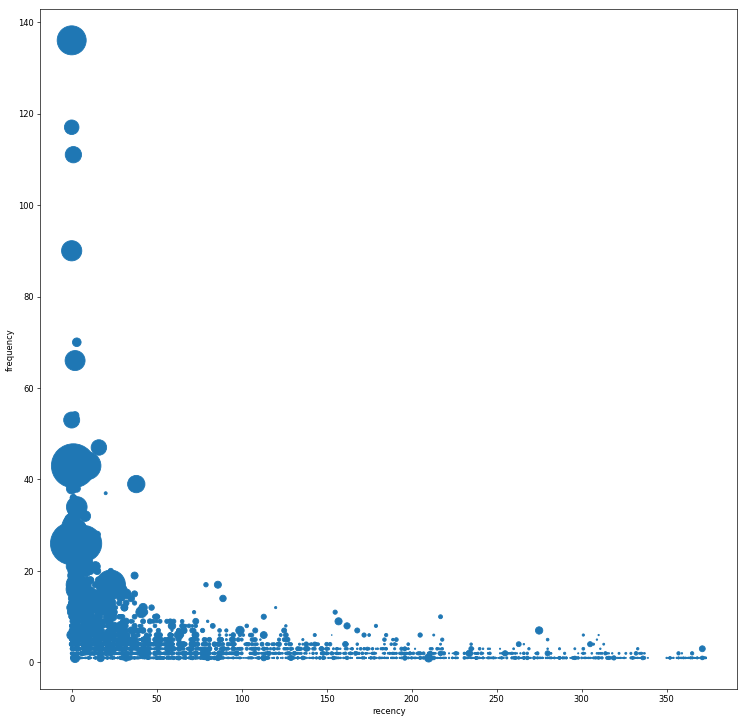

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 15), dpi=60)
x = np.array(data['recency'])
y = np.array(data['frequency'])
z = np.array(data['monetization'])
area = z/100
plt.scatter(x, y, s=area)
plt.ylabel('frequency')
plt.xlabel('recency')
plt.show()

In [12]:
#NORMALIZE DATA FOR KMEANS
import preprocess_data as o
n_data=o.normalize_data(data)
#print (message)


In [13]:
n_data.head(5)
n_data.describe()

,monetization,recency,frequency
count,4324.000000,4324.000000,4324.000000
mean,0.918982,0.214596,0.003935
std,0.170356,0.283418,0.009138
min,0.012625,0.000000,0.000081
25%,0.949173,0.012817,0.002169
50%,0.997390,0.071610,0.003054
75%,0.999908,0.314038,0.004652
max,1.000000,0.999915,0.567733


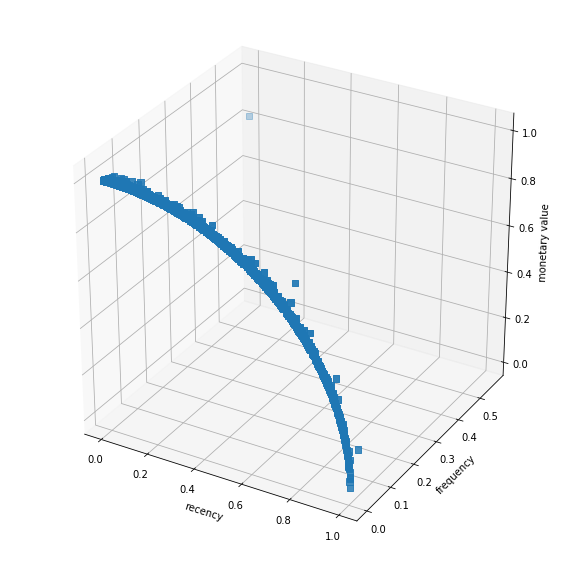

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x_n = np.array(n_data['recency'])
y_n = np.array(n_data['frequency'])
z_n = np.array(n_data['monetization'])

ax.scatter(x_n,y_n,z_n, marker="s",  s=40)

plt.show()

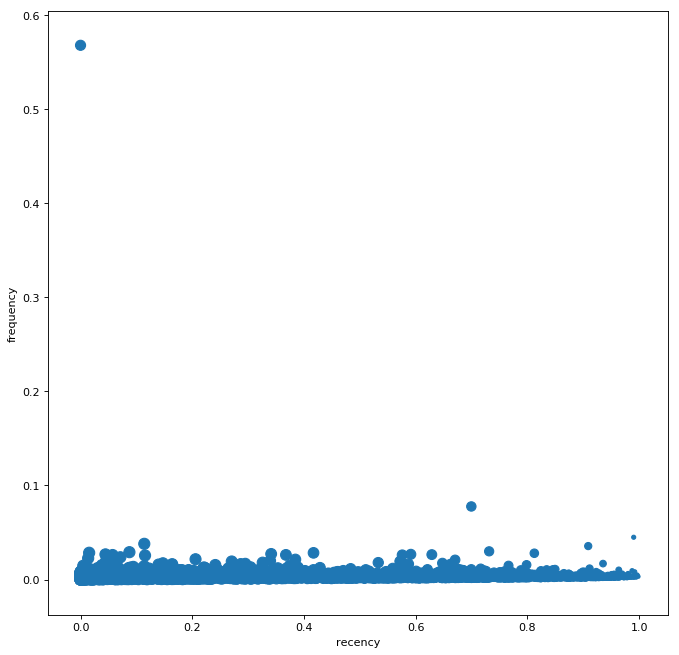

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10), dpi=80)

area = z_n*100
plt.scatter(x_n, y_n, s=area)
plt.ylabel('frequency')
plt.xlabel('recency')
plt.show()

## Explore Clusters for KMeans


For K-means n_clusters = 2. The average silhouette_score is : -0.224862898602069
For K-means n_clusters = 3. The average silhouette_score is : -0.3192692380891014
For K-means n_clusters = 4. The average silhouette_score is : -0.30165568957543304
For K-means n_clusters = 5. The average silhouette_score is : -0.30590276242683767
For K-means n_clusters = 6. The average silhouette_score is : -0.3082645706021767
For K-means n_clusters = 7. The average silhouette_score is : -0.300087956701763
For K-means n_clusters = 8. The average silhouette_score is : -0.30827768674140427
For K-means n_clusters = 9. The average silhouette_score is : -0.3008058919536178
For K-means n_clusters = 10. The average silhouette_score is : -0.2865923732712396
For K-means n_clusters = 11. The average silhouette_score is : -0.28495951883537834
For K-means n_clusters = 12. The average silhouette_score is : -0.29269082247150957
For K-means n_clusters = 13. The average silhouette_score is : -0.29655328238445344
For K-me

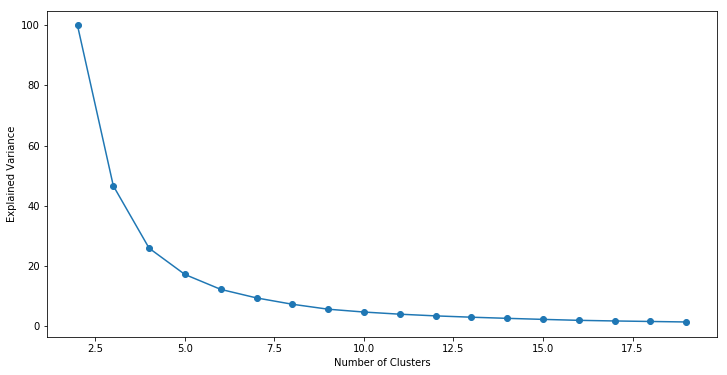

In [16]:
#Elbow method & silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Pretty display for notebooks
%matplotlib inline

cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,algorithm = "auto")
    clusters.fit(n_data)
    preds = clusters.predict(n_data)
    cluster_errors.append( clusters.inertia_ )
    score = silhouette_score(data, preds, metric='euclidean')
    print ("For K-means n_clusters = {}. The average silhouette_score is : {}".format(num_clusters, score))

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.ylabel('Explained Variance')
plt.xlabel('Number of Clusters')
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Implement Algorithms 
<a id='implement'></a>


In [17]:
n_data.index

RangeIndex(start=0, stop=4324, step=1)

In [18]:
#Select a few observations to sample from the dataset
indices = [1,2,3,4,5]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(n_data.loc[indices], columns = n_data.keys()).reset_index(drop = True)
samples_z = pd.DataFrame(n_data.loc[indices], columns = n_data.keys()).reset_index(drop = True)
print ("Chosen samples of dataset:")

#calculate the z score to understand the location of the feauture for each customer in density plot
for col in n_data.columns:
    col_zscore = col + '_zscore'
    samples_z[col_zscore] = (samples_z[col] - data[col].mean())/data[col].std()
samples_z

Chosen samples of dataset:


,monetization,recency,frequency,monetization_zscore,recency_zscore,frequency_zscore
0,0.999151,0.041139,0.002224,-0.233716,-0.913664,-0.646960
1,0.999947,0.010241,0.000569,-0.233716,-0.913973,-0.647236
2,0.734448,0.678662,0.002196,-0.233748,-0.907291,-0.646964
3,0.999678,0.024898,0.004980,-0.233716,-0.913826,-0.646500
4,0.401525,0.915837,0.004512,-0.233788,-0.904920,-0.646578


In [19]:
#n_data.drop(['CustomerID'], axis = 1, inplace = True)
#n_data.drop(['cluster'], axis = 1, inplace = True)

In [20]:
#Find cluster centers and size using Kmeans
# Loop through clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = range(5,7)
for n_clusters in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(n_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(n_data)
    
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)

    #cluster centers
    centers = clusterer.cluster_centers_
    score=silhouette_score(n_data, preds, metric='euclidean')

    #centroids of each cluster
    centers_df = pd.DataFrame(centers)
    centers_df.columns=data.columns
    
    cluster_size=np.bincount(preds)
    centers_df.insert(loc=0, column='cluster_size', value=cluster_size)
    centers_df_int64=centers_df#.astype('int64')
    
    print ("For n_clusters = {}".format(n_clusters))
    print("Silhouette Coefficient: %0.3f" % score )

    display(centers_df_int64)    

For n_clusters = 5
Silhouette Coefficient: 0.674


,cluster_size,monetization,recency,frequency
0,2600,0.998794,0.032728,0.003592
1,249,0.360261,0.924901,0.003938
2,406,0.861993,0.498732,0.004724
3,735,0.972578,0.222423,0.004421
4,334,0.665065,0.740152,0.004571


For n_clusters = 6
Silhouette Coefficient: 0.658


,cluster_size,monetization,recency,frequency
0,726,0.982947,0.176701,0.004254
1,337,0.786058,0.613211,0.004904
2,206,0.332251,0.936564,0.004058
3,2445,0.999148,0.027412,0.003551
4,374,0.920736,0.383583,0.004756
5,236,0.590094,0.803411,0.004124


In [21]:
n_data['customer_id']=CustomerID
n_data['cluster'] = pd.Series(preds, index=n_data.index)
n_data.to_csv('normalizeddata_withcluster_rfm.csv', index=False)
display(n_data.head(5))


data['customer_id']=CustomerID
data['cluster'] = pd.Series(preds, index=data.index)

df=pd.merge(data, n_data, how='inner', on='customer_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False
         )

,monetization,recency,frequency,customer_id,cluster
0,0.999999,0.000232,0.001624,12347.0,3
1,0.999151,0.041139,0.002224,12348.0,3
2,0.999947,0.010241,0.000569,12349.0,3
3,0.734448,0.678662,0.002196,12350.0,1
4,0.999678,0.024898,0.004980,12352.0,3


In [22]:
df.to_csv('data_withcluster_rfm.csv', index=False)
df.head(5)

,monetization_x,recency_x,frequency_x,customer_id,cluster_x,monetization_y,recency_y,frequency_y,cluster_y
0,4310.00,1,7,12347.0,3,0.999999,0.000232,0.001624,3
1,1797.24,74,4,12348.0,3,0.999151,0.041139,0.002224,3
2,1757.55,18,1,12349.0,3,0.999947,0.010241,0.000569,3
3,334.40,309,1,12350.0,1,0.734448,0.678662,0.002196,1
4,1405.28,35,7,12352.0,3,0.999678,0.024898,0.004980,3


In [23]:
n_data.groupby("cluster").size()

cluster
0     726
1     337
2     206
3    2445
4     374
5     236
dtype: int64

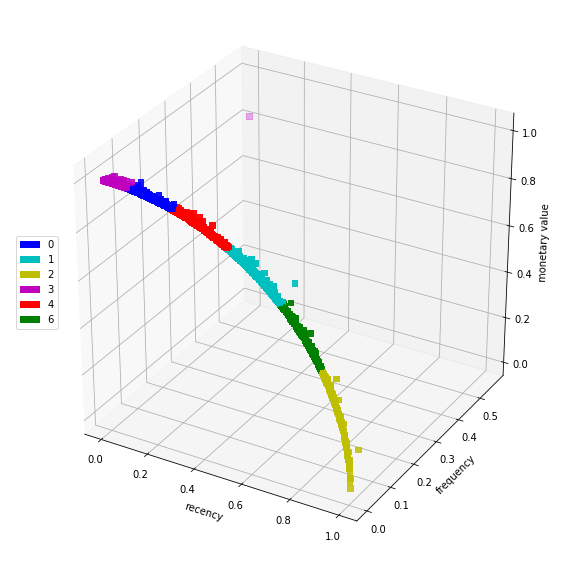

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(n_data['recency'])
y = np.array(n_data['frequency'])
z = np.array(n_data['monetization'])

colors=['b', 'c', 'y', 'm', 'r','g']
custom_cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

clusters=[0,1,2,3,4,6]

# marker="s" for square, s=30 is for size of the square
ax.scatter(x,y,z, marker="s", c=n_data["cluster"], s=30, cmap=custom_cmap)
import matplotlib.patches as mpatches

recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,clusters,loc=6)

plt.show()

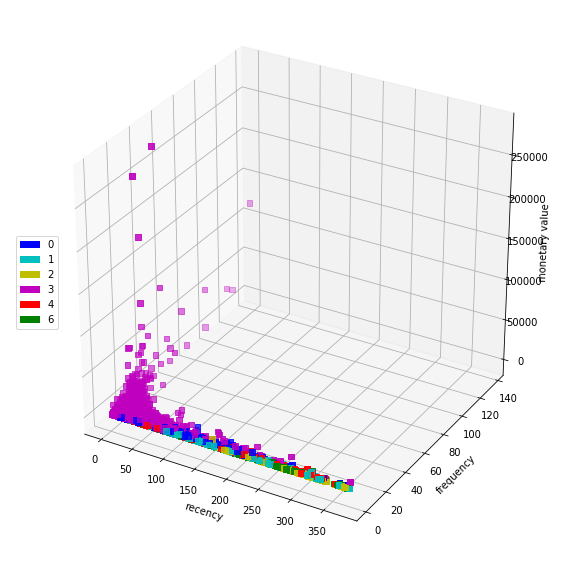

In [25]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(data['recency'])
y = np.array(data['frequency'])
z = np.array(data['monetization'])

colors=['b', 'c', 'y', 'm', 'r','g']
custom_cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

clusters=[0,1,2,3,4,6]

# marker="s" for square, s=30 is for size of the square
ax.scatter(x,y,z, marker="s", c=n_data["cluster"], s=30, cmap=custom_cmap)
import matplotlib.patches as mpatches

recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,clusters,loc=6)

plt.show()

In [26]:
#Find cluster centers and size using GaussianMixture
# Loop through clusters
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)

range_n_clusters = range(2,4)
for n in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n).fit(n_data)

    #Predict the cluster for each data point
    preds = clusterer.predict(n_data)
    
    #Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)

    #cluster centers
    centers = clusterer.means_
    score = silhouette_score(n_data, preds, metric='mahalanobis')

    #centroids of each cluster
    centers_df = pd.DataFrame(centers)
    
    
    cluster_size=np.bincount(preds)
    centers_df.insert(loc=0, column='cluster_size', value=cluster_size)
    centers_df_int64=centers_df#.astype('int64')
    
    print ("For GMM with n_clusters = {}. The average silhouette_score is : {}".format(n, score))
    display(centers_df_int64)  
    #Display the predictions
    for i, pred in enumerate(sample_preds):
        print ("Sample point", i, "predicted to be in Cluster", pred)

For GMM with n_clusters = 2. The average silhouette_score is : 0.5594945038714088


,cluster_size,0,1,2
0,2808,0.998071,0.041046,0.00366
1,1516,0.773540,0.533747,0.00444


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 1
For GMM with n_clusters = 3. The average silhouette_score is : 0.47432232364755056


,cluster_size,0,1,2
0,973,0.664107,0.693483,0.004554
1,2403,0.999207,0.026189,0.003606
2,948,0.976204,0.201185,0.004130


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 0


In [27]:
n_data['customer_id']=CustomerID
n_data['cluster'] = pd.Series(preds, index=n_data.index)
n_data.to_csv('gm_normalizeddata_withcluster_rfm.csv', index=False)
display(n_data.head(5))


data['customer_id']=CustomerID
data['cluster'] = pd.Series(preds, index=data.index)

df=pd.merge(data, n_data, how='inner', on='customer_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False
         )
df.to_csv('gm_data_withcluster_rfm.csv', index=False)
df.head(5)

,monetization,recency,frequency,customer_id,cluster
0,0.999999,0.000232,0.001624,12347.0,1
1,0.999151,0.041139,0.002224,12348.0,1
2,0.999947,0.010241,0.000569,12349.0,1
3,0.734448,0.678662,0.002196,12350.0,0
4,0.999678,0.024898,0.004980,12352.0,1


,monetization_x,recency_x,frequency_x,customer_id,cluster_x,monetization_y,recency_y,frequency_y,cluster_y
0,4310.00,1,7,12347.0,1,0.999999,0.000232,0.001624,1
1,1797.24,74,4,12348.0,1,0.999151,0.041139,0.002224,1
2,1757.55,18,1,12349.0,1,0.999947,0.010241,0.000569,1
3,334.40,309,1,12350.0,0,0.734448,0.678662,0.002196,0
4,1405.28,35,7,12352.0,1,0.999678,0.024898,0.004980,1


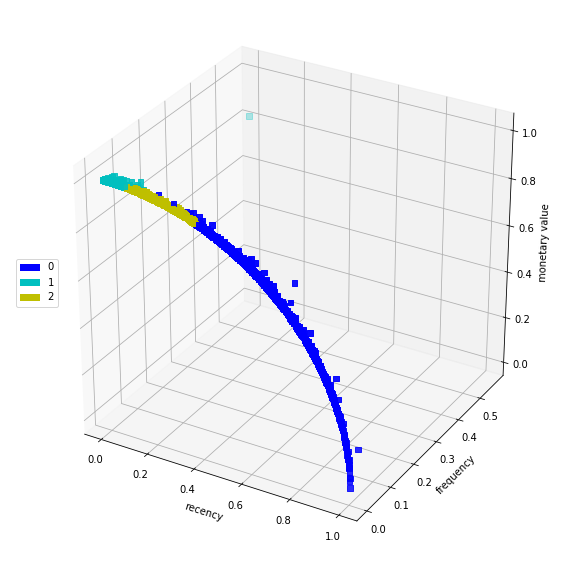

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(n_data['recency'])
y = np.array(n_data['frequency'])
z = np.array(n_data['monetization'])

colors=['b', 'c', 'y']
custom_cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

clusters=[0,1,2]

# marker="s" for square, s=30 is for size of the square
ax.scatter(x,y,z, marker="s", c=n_data["cluster"], s=30, cmap=custom_cmap)
import matplotlib.patches as mpatches

recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,clusters,loc=6)

plt.show()

In [29]:

if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2).fit(n_data)
#algorithm='ball_tree'
distances, indices = nbrs.kneighbors(n_data)
nn_distances=distances[:,1]

(array([397., 340., 208., 187., 128.,  93., 103.,  73.,  71.,  45.,  47.,
         38.,  36.,  23.,  25.,  22.,  17.,   9.,  17.,  13.,  14.,  10.,
          3.,   6.,   3.,   3.,  13.,   4.,   4.,   4.,   2.,   0.,   3.,
          3.,   2.,   4.,   0.,   3.,   1.,   1.,   1.,   0.,   2.,   0.,
          2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,
          1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

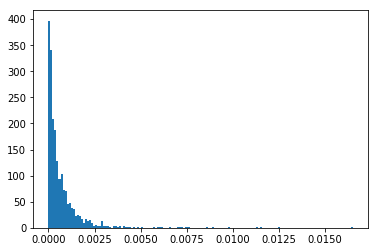

In [60]:
import numpy as np
import matplotlib.pyplot as plt


plt.hist(nn_distances[0:2000], bins='auto')
#len(nn_distances[nn_distances<.0005])
#percent=(3500/4234)
#percent
#.0025

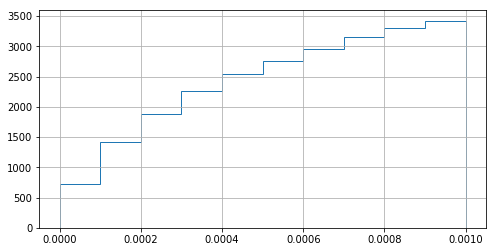

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(nn_distances, histtype='step', range=(0, .001),cumulative=True, label='Empirical')

# tidy up the figure
ax.grid(True)
plt.show()

In [37]:
from scipy import stats

np.histogram(nn_distances)
np.savetxt("nn_distances.csv", nn_distances, delimiter=",")
stats.describe(nn_distances)

DescribeResult(nobs=4324, minmax=(6.231213108558419e-07, 0.5674956998290852), mean=0.0009039063998111775, variance=7.749912559211304e-05, skewness=61.81392435983957, kurtosis=3967.8730310312285)

In [69]:
'''
import matplotlib.pyplot as plt

#plt.matshow(n_data.corr())

n_data.head()
#n_data.corr()
#n_data_rfm=n_data["recency","frequency","monetization"]
n_data_t=n_data.transpose()
n_data_t.head()
p=n_data_t.corr()
p.head()
'''

,0,1,2,3,4,5,6,7,8,9,...,4314,4315,4316,4317,4318,4319,4320,4321,4322,4323
monetization,0.999999,0.999151,0.999947,0.734448,0.999678,0.401525,0.977858,0.907228,0.999969,0.999987,...,0.999998,0.999880,0.991899,0.888494,0.922041,0.546155,0.409601,0.999165,0.999977,0.999737
recency,0.000232,0.041139,0.010241,0.678662,0.024898,0.915837,0.209269,0.420635,0.007825,0.005155,...,0.000650,0.004901,0.126992,0.458817,0.387056,0.837679,0.912251,0.039282,0.001432,0.022854
frequency,0.001624,0.002224,0.000569,0.002196,0.004980,0.004512,0.000906,0.001975,0.001067,0.000161,...,0.001949,0.014704,0.002953,0.008049,0.005302,0.003024,0.005068,0.011223,0.006683,0.001632


In [140]:
import numpy as np
import scipy.spatial as spatial

def getNeighborCount_spatial_cKDTree(data,k):
    neighorcount=0
    for observation in range(len(data)):
        point_tree = spatial.cKDTree(data)
        neighors_within_dist_k=point_tree.query_ball_point(data.loc[observation], k)
        neighorcount=len(neighors_within_dist_k)
        data.loc[observation]["neighorcount"] =   neighorcount
        #display(neighorcount)
        #display(data.loc[observation])
    return data

n_data["neighorcount"]=0
n_data = getNeighborCount_spatial_cKDTree(n_data,.001)
n_data.groupby("neighorcount").size()

C:\Users\ksaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


data = [go.Histogram(x=nn_distances,
                     cumulative=dict(enabled=True))]

py.iplot(data, filename='cumulative histogram')

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns


# seaborn histogram
sns.distplot(nn_distances)


In [ ]:
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics


if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)


clusterer_DB = DBSCAN(eps=0.00194873785636661, min_samples=10).fit(n_data)
labels_DB = clusterer_DB.labels_

#display(labels_DB)
display(len(set(labels_DB)))

score_DB=1#silhouette_score(n_data, labels_DB, metric='euclidean')

print("Silhouette Coefficient: %0.3f" % score_DB )

n_data['cluster']=labels_DB
n_data['customer_id']=CustomerID
n_data.head(10)

n_data[["customer_id", "cluster"]].to_csv('finaldatawithcluster_DB_monthly_frequency', index=False)

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, xlabel='recency',ylabel='frequency',zlabel='monetary value',projection='3d')
x = np.array(n_data['recency'])
y = np.array(n_data['frequency'])
z = np.array(n_data['monetization'])

colors=['b', 'c', 'y', 'm', 'r','g']
custom_cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

clusters=[0,1,2,3,4,5]

# marker="s" for square, s=30 is for size of the square
ax.scatter(x,y,z, marker="s", c=n_data["cluster"], s=30, cmap=custom_cmap)
import matplotlib.patches as mpatches

recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,clusters,loc=6)

plt.show()

In [ ]:
n_data['customer_id']=CustomerID
n_data['cluster'] = pd.Series(preds, index=n_data.index)
n_data.to_csv('gm_normalizeddata_withcluster_rfm.csv', index=False)
display(n_data.head(5))


data['customer_id']=CustomerID
data['cluster'] = pd.Series(preds, index=data.index)

df=pd.merge(data, n_data, how='inner', on='customer_id', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False
         )
df.to_csv('gm_data_withcluster_rfm.csv', index=False)
df.head(5)

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)


# Compute Affinity Propagation
af = AffinityPropagation().fit(n_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)


import matplotlib.pyplot as plt
from itertools import cycle

print(n_clusters)
n_data['cluster']=labels
n_data['customer_id']=CustomerID
n_data.head(10)

n_data[["customer_id", "cluster"]].to_csv('finaldatawithcluster_AP_monthly_frequency', index=False)

In [ ]:
n_data.groupby("cluster").size()
#n_clusters

In [161]:
#AgglomerativeClustering

if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)


from sklearn.cluster import AgglomerativeClustering
# Affinity = {"“euclidean", “l1”, “l2”, “manhattan”,
# “cosine”}
# Linkage = {"ward"}#, “complete”, “average”}
Hclustering = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
Hclustering.fit(n_data)
#Hclustering.fit_predict(n_data)
#ms = np.column_stack((ground_truth,Hclustering.labels_))
#df = pd.DataFrame(ms,
# columns = [‘Ground truth’,’Clusters’])
#pd.crosstab(df[‘Ground truth’], df[‘Clusters’],
# margins=True)

labels_HC = Hclustering.labels_

display(labels_HC)
len(set(labels_HC))

#n_data['cluster']=labels_HC
#n_data['customer_id']=CustomerID.astype('Int64')
#display(n_data.head(10))
#true_centers_Kmeans_df_int64['cluster'] = pd.Series(true_centers_Kmeans_df_int64.index, index=true_centers_Kmeans_df_int64.index)
#n_data[['customer_id','cluster']].to_csv('customerwithcluster_HC_monthly_frequency.csv', index=False)

array([ 9, 12,  9, ..., 12,  9, 18], dtype=int64)

20

In [169]:
#np.unique(labels_HC)

from collections import Counter


display(Counter(labels_HC).keys()) # equals to list(set(words))
display(Counter(labels_HC).values()) # counts the elements' frequency


dict_keys([9, 12, 4, 18, 0, 14, 10, 19, 6, 8, 17, 11, 3, 1, 2, 15, 5, 7, 13, 16])

dict_values([1178, 440, 110, 534, 111, 190, 131, 55, 278, 118, 290, 217, 69, 191, 134, 60, 89, 104, 24, 1])

In [170]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    display(distance)

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    display(no_of_observations)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, p=30, truncate_mode="", **kwargs)


array([   0,    1,    2, ..., 4320, 4321, 4322])

array([   2,    3,    4, ..., 4322, 4323, 4324])

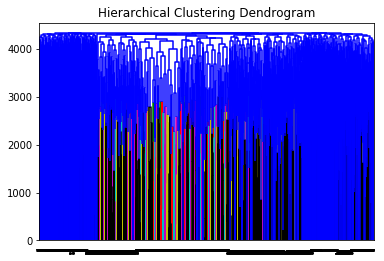

In [162]:
from matplotlib import pyplot as plt


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(Hclustering, labels=Hclustering.labels_)
plt.show()

In [142]:
n_data.groupby("cluster").size()

cluster
0     421
1     659
2    2660
3     226
4     265
5      93
dtype: int64

In [157]:
if 'customer_id' in n_data.columns:
    n_data.drop(['customer_id'], axis = 1, inplace = True)
if 'cluster' in n_data.columns:
    n_data.drop(['cluster'], axis = 1, inplace = True)

In [155]:

# needed imports# neede 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Z = linkage(n_data, 'ward')

In [156]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(n_data))
c

0.8931531954217576

In [ ]:
#data.drop(['customer_id'], axis = 1, inplace = True)
#data.drop(['cluster'], axis = 1, inplace = True)

from scipy.spatial.distance import squareform, pdist
import seaborn as sns


distance_DB=pd.DataFrame(squareform(pdist(n_data.iloc[:, 1:])))

#display(distance_DB)
distance_DB.describe()

all_numbers=distance_DB.values.tolist()

flat_list = [item for sublist in all_numbers for item in sublist]

flat_list

np.histogram(flat_list)

n, bins, patches = plt.hist(flat_list)
print("n: ", n, sum(n))
print("bins: ", bins)
for i in range(len(bins)-1):
    print(bins[i+1] -bins[i])
print("patches: ", patches)
print(patches[1])

# sort the data:
sorted_flat_list = np.sort(flat_list)

# calculate the proportional values of samples
p = 1. * np.arange(len(flat_list)) / (len(flat_list) - 1)

# plot the sorted data:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, sorted_flat_list)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(sorted_flat_list, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

sns.distplot(flat_list);


### Reference
<a id='reference'></a>
Density based clustering..https://codeahoy.com/2017/02/19/cluster-analysis-using-k-means-explained/

t-SNE: http://lvdmaaten.github.io/tsne/

Cluster Analysis: Basic COncepts and Algorithm: https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf

DB SCAN: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

sparch tools: https://github.com/alitouka/spark_dbscan/wiki/Choosing-parameters-of-DBSCAN-algorithm

RFM score: https://www.putler.com/rfm-analysis/

Astropy: http://docs.astropy.org/en/stable/install.html#anaconda-install

Astropy:https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram

Dendogram: https://stackoverflow.com/questions/29127013/plot-dendrogram-using-sklearn-agglomerativeclustering

Dendogram: https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py

HCC: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

### Clustering 101
Different Types of Clusterings
hierarchical (nested) versus partitional (unnested)
exclusive versus overlapping versus fuzzy
complete versus partial

Questions to ask:
Is data Hierarchical versus Partitional:whether the set of clusters is nested or unnestedl. 
A partitional clustering is simply a division of the set of data objects into non-overlapping subsets (clusters) such that each data object is in exactly one subset. 

If we permit clusters to have subclusters, then we obtain a hierarchical clustering, which is a set of nested clusters that are organized as a tree. Each node (cluster) in the tree (except for the leaf nodes) is the union of its children (subclusters), and the root of the tree is the cluster containing all the objects. Often, but not always, the leaves of the tree are singleton clusters of individual data objects.

Exclusive versus Overlapping versus Fuzzy There are many situations in which a point could reasonably be placed in more than one cluster, and these situations are better addressed by non-exclusive clustering. In the most general sense, an overlapping or non-exclusive clustering is used to reflect the fact that an object can simultaneously belong to more than one group (class). 

In a fuzzy clustering, every object belongs to every cluster with a mem- bership weight that is between 0 (absolutely doesn’t belong) and 1 (absolutely belongs). In other words, clusters are treated as fuzzy sets. (Mathematically, a fuzzy set is one in which an object belongs to any set with a weight that is between 0 and 1. In fuzzy clustering, we often impose the additional constraint that the sum of the weights for each object must equal 1.) Similarly, probabilistic clustering techniques compute the probability with which each point belongs to each cluster, and these probabilities must also sum to 1. These approaches are most appropriate for avoiding the arbitrariness of assigning an object to only one cluster when it may be close to several. In practice, a fuzzy or probabilistic clustering is often converted to an exclusive clustering by assigning each object to the cluster in which its membership weight or probability is highest.

Complete versus Partial A complete clustering assigns every object to a cluster, whereas a partial clustering does not. The motivation for a partial clustering is that some objects in a data set may not belong to well-defined groups. Many times objects in the data set may represent noise, outliers, or “uninteresting background.” 

Clustering aims to find useful groups of objects (clusters), where usefulness is defined by the goals of the data analysis. 

Well-Separated A cluster is a set of objects in which each object is closer (or more similar) to every other object in the cluster than to any object not in the cluster. Sometimes a threshold is used to specify that all the objects in a cluster must be sufficiently close (or similar) to one another. This idealistic definition of a cluster is satisfied only when the data contains natural clusters that are quite far from each other.Well-separated clusters do not need to be globular, but can have any shape.
Prototype-Based A cluster is a set of objects in which each object is closer (more similar) to the prototype that defines the cluster than to the prototype of any other cluster. For data with continuous attributes, the prototype of a cluster is often a centroid, i.e., the average (mean) of all the points in the clus- ter. When a centroid is not meaningful, such as when the data has categorical attributes, the prototype is often a medoid, i.e., the most representative point of a cluster. For many types of data, the prototype can be regarded as the most central point, and in such instances, we commonly refer to prototype- based clusters as center-based clusters. Not surprisingly, such clusters tend to be globular. 

Graph-Based If the data is represented as a graph, where the nodes are objects and the links represent connections among objects (see Section 2.1.2), then a cluster can be defined as a connected component; i.e., a group of objects that are connected to one another, but that have no connection to objects outside the group. An important example of graph-based clusters are contiguity-based clusters, where two objects are connected only if they are within a specified distance of each other. This implies that each object in a contiguity-based cluster is closer to some other object in the cluster than to any point in a different cluster.

Other types of graph-based clusters are also possible. One such approach (Section 8.3.2) defines a cluster as a clique; i.e., a set of nodes in a graph that are completely connected to each other. Specifically, if we add connections between objects in the order of their distance from one another, a cluster is formed when a set of objects forms a clique. Like prototype-based clusters, such clusters tend to be globular.

Density-Based A cluster is a dense region of objects that is surrounded by a region of low density. A density- based definition of a cluster is often employed when the clusters are irregular or intertwined, and when noise and outliers are present. 

Shared-Property (Conceptual Clusters) More generally, we can define a cluster as a set of objects that share some property. This definition encom- passes all the previous definitions of a cluster; e.g., objects in a center-based cluster share the property that they are all closest to the same centroid or medoid. However, the shared-property approach also includes new types of clusters.  a clustering algorithm would need a very specific concept of a cluster to successfully detect these clusters. The process of find- ing such clusters is called conceptual clustering. 
• K-means. This is a prototype-based, partitional clustering technique that attempts to find a user-specified number of clusters (K), which are represented by their centroids.
• Agglomerative Hierarchical Clustering. This clustering approach refers to a collection of closely related clustering techniques that produce a hierarchical clustering by starting with each point as a singleton cluster and then repeatedly merging the two closest clusters until a single, all- encompassing cluster remains. Some of these techniques have a natural interpretation in terms of graph-based clustering, while others have an interpretation in terms of a prototype-based approach.
• DBSCAN. This is a density-based clustering algorithm that produces a partitional clustering, in which the number of clusters is automatically determined by the algorithm. Points in low-density regions are classi- fied as noise and omitted; thus, DBSCAN does not produce a complete clustering.

Baysian Hierarchichal Clustering

### Why normalize?
K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance.
In distance-based classification, for instance, we need to normalize eache feature value of a feature vector in order to not get conditioned by features with wider range of possible values when computing distances.
If a feature has range in [-1,1] and another feature has range in [-100; 100], a small variation in the feature 2 is probably more influencing than a big variation in feature 1 when computing the distance of two feature vectors.

In this project, frequency range is small compared to monetization range. for example a user bought 10 times and spend 1000 and another user bought 20 times and spend 1010. It may seem like the difference in frequency is same as the difference in 
monetization, which is not the case.

### K-Means Clustering

K-means and its variations have a number of limitations with respect to finding different types of clusters. In particular, K-means has difficulty detecting the “natural” clusters, when clusters have non-spherical shapes or widely different sizes or densities.The difficulty in these three situations is that the K-means objective function is a mismatch for the kinds of clusters we are trying to find since it is minimized by globular clusters of equal size and density or by clusters that are well separated. However, these limitations can be overcome, in some sense, if the user is willing to accept a clustering that breaks the natural clusters into a number of subclusters. 
K-means is simple and can be used for a wide variety of data types. It is also quite efficient, even though multiple runs are often performed. Some variants, including bisecting K-means, are even more efficient, and are less suscepti- ble to initialization problems. K-means is not suitable for all types of data,
 It cannot handle non-globular clusters or clusters of different sizes and densities, although it can typically find pure subclusters if a large enough number of clusters is specified. K-means also has trouble clustering data that contains outliers. Outlier detection and removal can help significantly in such situations. Finally, K-means is restricted to data for which there is a notion of a center (centroid). A related technique, K-medoid clustering, does not have this restriction, but is more expensive.


K-means is centroid based technique which works well when there is well defined deparation.
In K-means clustering Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance 

Prototype-based clustering techniques create a one-level partitioning of the data objects. There are a number of such techniques, but two of the most prominent are K-means and K-medoid. K-means defines a prototype in terms of a centroid, which is usually the mean of a group of points, and is typically
(b) Center-based clusters. Each point is closer to the center of its cluster than to the center of any other cluster.
(c) Contiguity-based clusters. Each point is closer to at least one point in its cluster than to any point in another cluster.
(d) Density-based clusters. Clus- ters are regions of high density sep- arated by regions of low density.

K-Means procedure - which is a vector quantization method often used as a clustering method - does not explicitly use pairwise distances b/w data points at all (in contrast to hierarchical and some other clusterings which allow for arbitrary proximity measure). It amounts to repeatedly assigning points to the closest centroid thereby using Euclidean distance from data points to a centroid. However, K-Means is implicitly based on pairwise Euclidean distances b/w data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. The term "centroid" is itself from Euclidean geometry. It is multivariate mean in euclidean space. Euclidean space is about euclidean distances. Non-Euclidean distances will generally not span Euclidean space. That's why K-Means is for Euclidean distances only.

K-Means clustering is a fast, robust, and simple algorithm that gives reliable results when data sets are distinct or well separated from each other in a linear fashion. It is best used when the number of cluster centers, is specified due to a well-defined list of types shown in the data. However, it is important to keep in mind that K-Means clustering may not perform well if it contains heavily overlapping data, if the Euclidean distance does not measure the underlying factors well, or if the data is noisy or full of outliers 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Assume the data have been clustered via any technique, such as k-means, into {\displaystyle k} k clusters. For each datum {\displaystyle i} i, let {\displaystyle a(i)} a(i) be the average distance between {\displaystyle i} i and all other data within the same cluster. We can interpret {\displaystyle a(i)} a(i) as a measure of how well {\displaystyle i} i is assigned to its cluster (the smaller the value, the better the assignment). We then define the average dissimilarity of point {\displaystyle i} i to a cluster {\displaystyle c} c as the average of the distance from {\displaystyle i} i to all points in {\displaystyle c} c.

Let {\displaystyle b(i)} b(i) be the lowest average distance of {\displaystyle i} i to all points in any other cluster, of which {\displaystyle i} i is not a member. The cluster with this lowest average dissimilarity is said to be the "neighbouring cluster" of {\displaystyle i} i because it is the next best fit cluster for point {\displaystyle i} i. We now define a silhouette:

{\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}} s(i) = \frac{b(i) - a(i)}{\max\{a(i),b(i)\}}
Which can be also written as:

{\displaystyle s(i)={\begin{cases}1-a(i)/b(i),&{\mbox{if }}a(i)<b(i)\\0,&{\mbox{if }}a(i)=b(i)\\b(i)/a(i)-1,&{\mbox{if }}a(i)>b(i)\\\end{cases}}} s(i) = \begin{cases}
  1-a(i)/b(i), & \mbox{if } a(i) < b(i) \\
  0,  & \mbox{if } a(i) = b(i) \\
  b(i)/a(i)-1, & \mbox{if } a(i) > b(i) \\
\end{cases}
From the above definition it is clear that

{\displaystyle -1\leq s(i)\leq 1}  -1 \le s(i) \le 1


The x % is a measure of the total variance in your data set that is explained by the clustering. k-means minimize the within group dispersion and maximize the between-group dispersion. By assigning the samples to k clusters rather than n (number of samples) clusters achieved a reduction in sums of squares of x %.

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean \mu_j of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)

Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.
K-Means algorithm go with minimum sum of squares to identify clusters of data points. Le’s say a data set has n observations of m variables. Here, we first identify initial centers of clusters. To perform this we can follow below steps: 
